# Progetto COVID 2

## Gruppo di lavoro

### Nome del gruppo:
ThetaRangers

### Partecipanti
- Daniele Ferrarelli
- Marco Ferri

# Scopo del progetto

# Dati

In [112]:
import numpy as np
import pandas as pd
import plotly.express as px
from datetime import datetime
from datetime import timedelta
import math
import matplotlib
import matplotlib.pyplot as plt

# Librerie da utilizzare plotly e geopandas

10 dicembre 2020 la turchia si impenna e fumano

In [113]:
#Fetch DataFrame from github csv
URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(URL)

In [114]:
#Format the DataFrame with new confirmed
countries = df['Country/Region'].unique()
days = df.columns[4:]
days_temp = []
list = []

#Convert dates in ISO
for day in days:
    date_obj = datetime.strptime(day, '%m/%d/%y')
    iso_date = date_obj.strftime('%Y-%m-%d')
    days_temp.append([day, iso_date])
    
days = days_temp

#Convert dates to ISO format
for country in countries:
    old_confirmed = math.nan
    for day in days:
        
        #Need sum because there are more states for some country
        sum = df.loc[df['Country/Region'] == country][day[0]].sum()
        newConfirmed = sum-old_confirmed
        
        list.append({"Country" : country, "Date" : day[1], "Confirmed" : sum, "New Confirmed" : newConfirmed if newConfirmed>0 or math.isnan(newConfirmed) else 0 })
        old_confirmed = sum
df = pd.DataFrame(list)
df

,Country,Date,Confirmed,New Confirmed
0,Afghanistan,2020-01-22,0,NaN
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0
...,...,...,...,...
73723,Zimbabwe,2021-02-04,34171,207.0
73724,Zimbabwe,2021-02-05,34331,160.0
73725,Zimbabwe,2021-02-06,34487,156.0
73726,Zimbabwe,2021-02-07,34552,65.0


In [5]:
#Plot of one country new confirmed as function
def country_plotting(df, country, field = "New Confirmed",figsize=(10,8), xstep=25):
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        print("Invalid field")
        return -1
    
    country = df.loc[df["Country"] == country]
    new_confirmed = country[field]
    dates = country["Date"]

    fig = plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
    plot = plt.plot(dates, new_confirmed)
    plt.xlabel("Date")
    plt.ylabel(field)
    #Edit x axis label frequency and rotation
    plt.xticks(np.arange(0, len(dates)+1, xstep), rotation=45)
    plt.show()

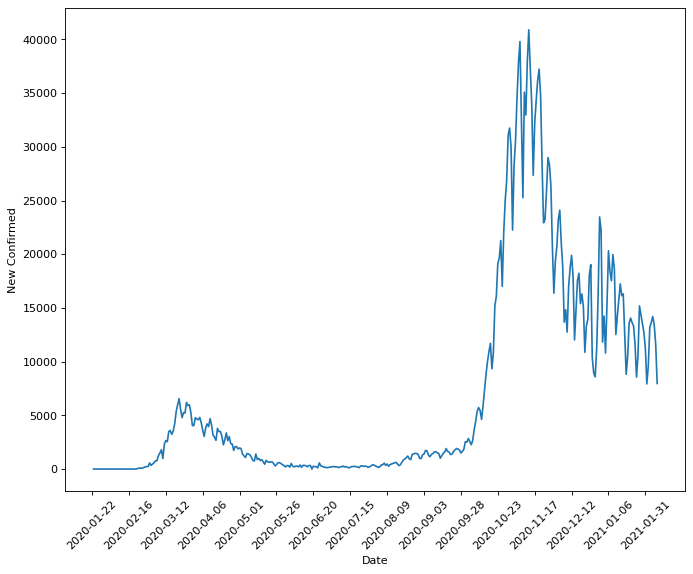

In [6]:
country_plotting(df, "Italy")

In [7]:
#Plot of 4 countries
def compare_countries(df, field, countries=["Italy", "France", "Germany", "United Kingdom"], figsize=(10,8), xstep=25):
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        print("Invalid field")
        return -1
    
    dates = df["Date"].unique()

    fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.xticks(np.arange(0, len(dates)+1, 10), rotation=45)
    plt.xlabel("Date")
    plt.ylabel(field)

    for country in countries:
        plt.plot(dates, df.loc[df["Country"] == country][field], label=country)

    plt.legend()
    plt.show()

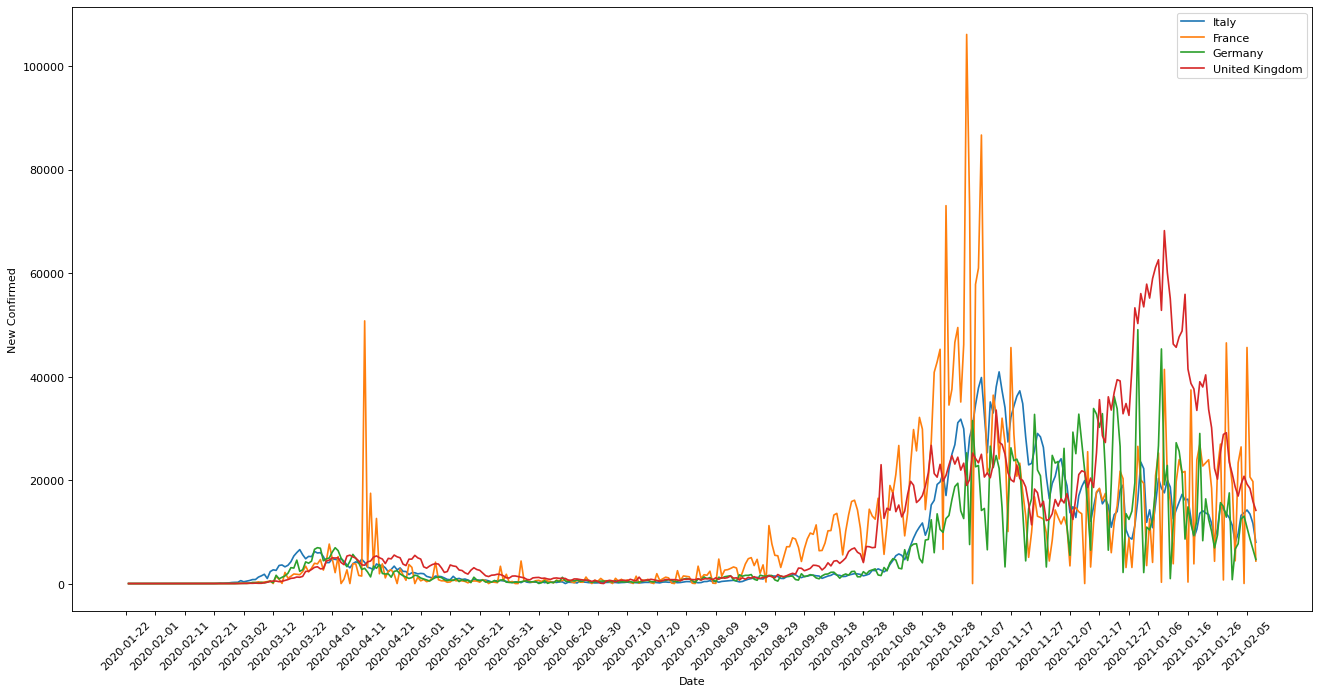

In [8]:
compare_countries(df, "New Confirmed")

In [9]:
#Rolling Average as function
def rolling_average(df, field, country, sizes=[7, 14, 21, 28], figsize=(10, 8), xstep=28):
    #check field is valid
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        print("Invalid field")
        return -1
    
    country_data = df.loc[df["Country"] == country]
    cases = country_data[field]
    dates = country_data["Date"]
    
    rolling_average = []
    
    for size in sizes:
        avg = cases.rolling(window=size).mean()
        rolling_average.append([avg, size])
        
    fig = plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
    plt.title("%s %s rolling average" % (country, field))
    plt.xticks(np.arange(0, len(dates)+1, xstep), rotation=45)
    for element, size in rolling_average:
        plt.plot(dates, element, label="Windows size %d" % size)
    
    plt.xlabel("Date")
    plt.ylabel(field)

    plt.legend()
    plt.show()

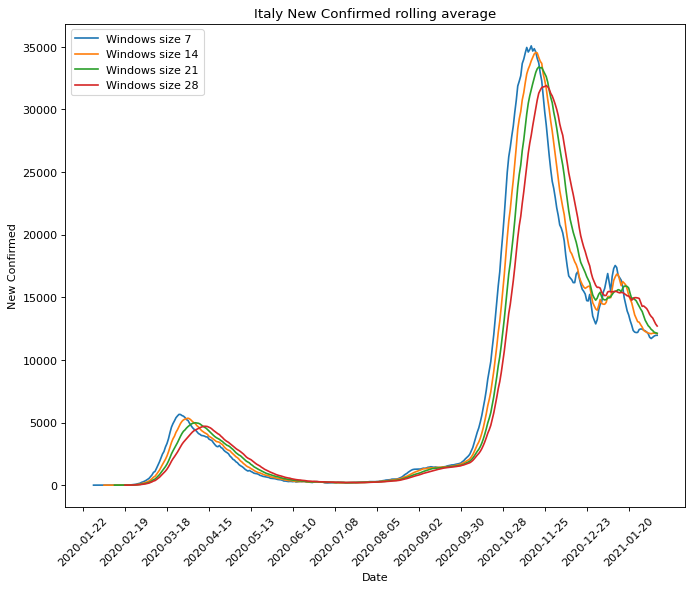

In [10]:
#rolling_average(df, "New Confirmed", "Italy", [28])
rolling_average(df, "New Confirmed", "Italy")

In [11]:
#Moving average global data
def global_data(df, field, sizes=[30], figsize=(12, 10), xstep=30):
    #check field is valid
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        print("Invalid field")        
        return -1

    #all dates
    dates = df["Date"].unique()

    #global data
    global_cases = []

    for day in dates:
        cases = df.loc[df["Date"] == day][field].sum()
        global_cases.append(cases)

    global_cases = pd.Series(global_cases)
    #moving average
    fig = plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')

    for size in sizes:
        avg = global_cases.rolling(window=size).mean()
        plt.plot(dates, avg, label="Window size %d" % size)

    plt.title("Global %s rolling average" % field)
    plt.xticks(np.arange(0, len(dates)+1, xstep), rotation=45)
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel(field)
    plt.show()

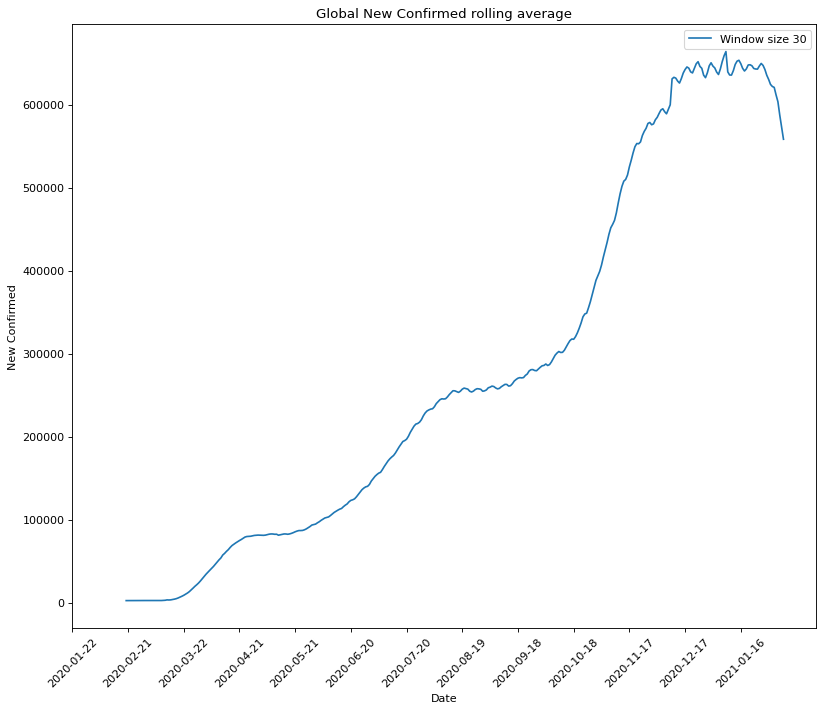

In [12]:
global_data(df, "New Confirmed")

In [13]:
df.loc[df["New Confirmed"].argmax()]

Country              Turkey
Date             2020-12-10
Confirmed           1748567
New Confirmed      823225.0
Name: 68291, dtype: object

In [14]:
def bar_plotting(df, date, field = "New Confirmed", figsize=(35, 10)):
#Bar graph for global cases in a single date
        #check field is valid
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        print("Invalid field")        
        return -1

    df_filtered = df.loc[df["Date"] == date]
    countries = df_filtered["Country"]

    fig = plt.figure(num=None, figsize=figsize, dpi=80, facecolor='w', edgecolor='k')
    width = 3

    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax.bar(range(0, len(countries) * width, width), df_filtered[field], width=width, align='center')
    ax.set_xticklabels(df_filtered["Country"], rotation=90)

    ax.set_xlabel("Country")
    ax.set_ylabel(field)
    ax.set_xticks(range(0, len(countries) * width, width))
    ax.set_title("Global %s in date %s" % (field, date))
    plt.show()

<ipython-input-14-059ec16cc2ce>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_filtered["Country"], rotation=90)


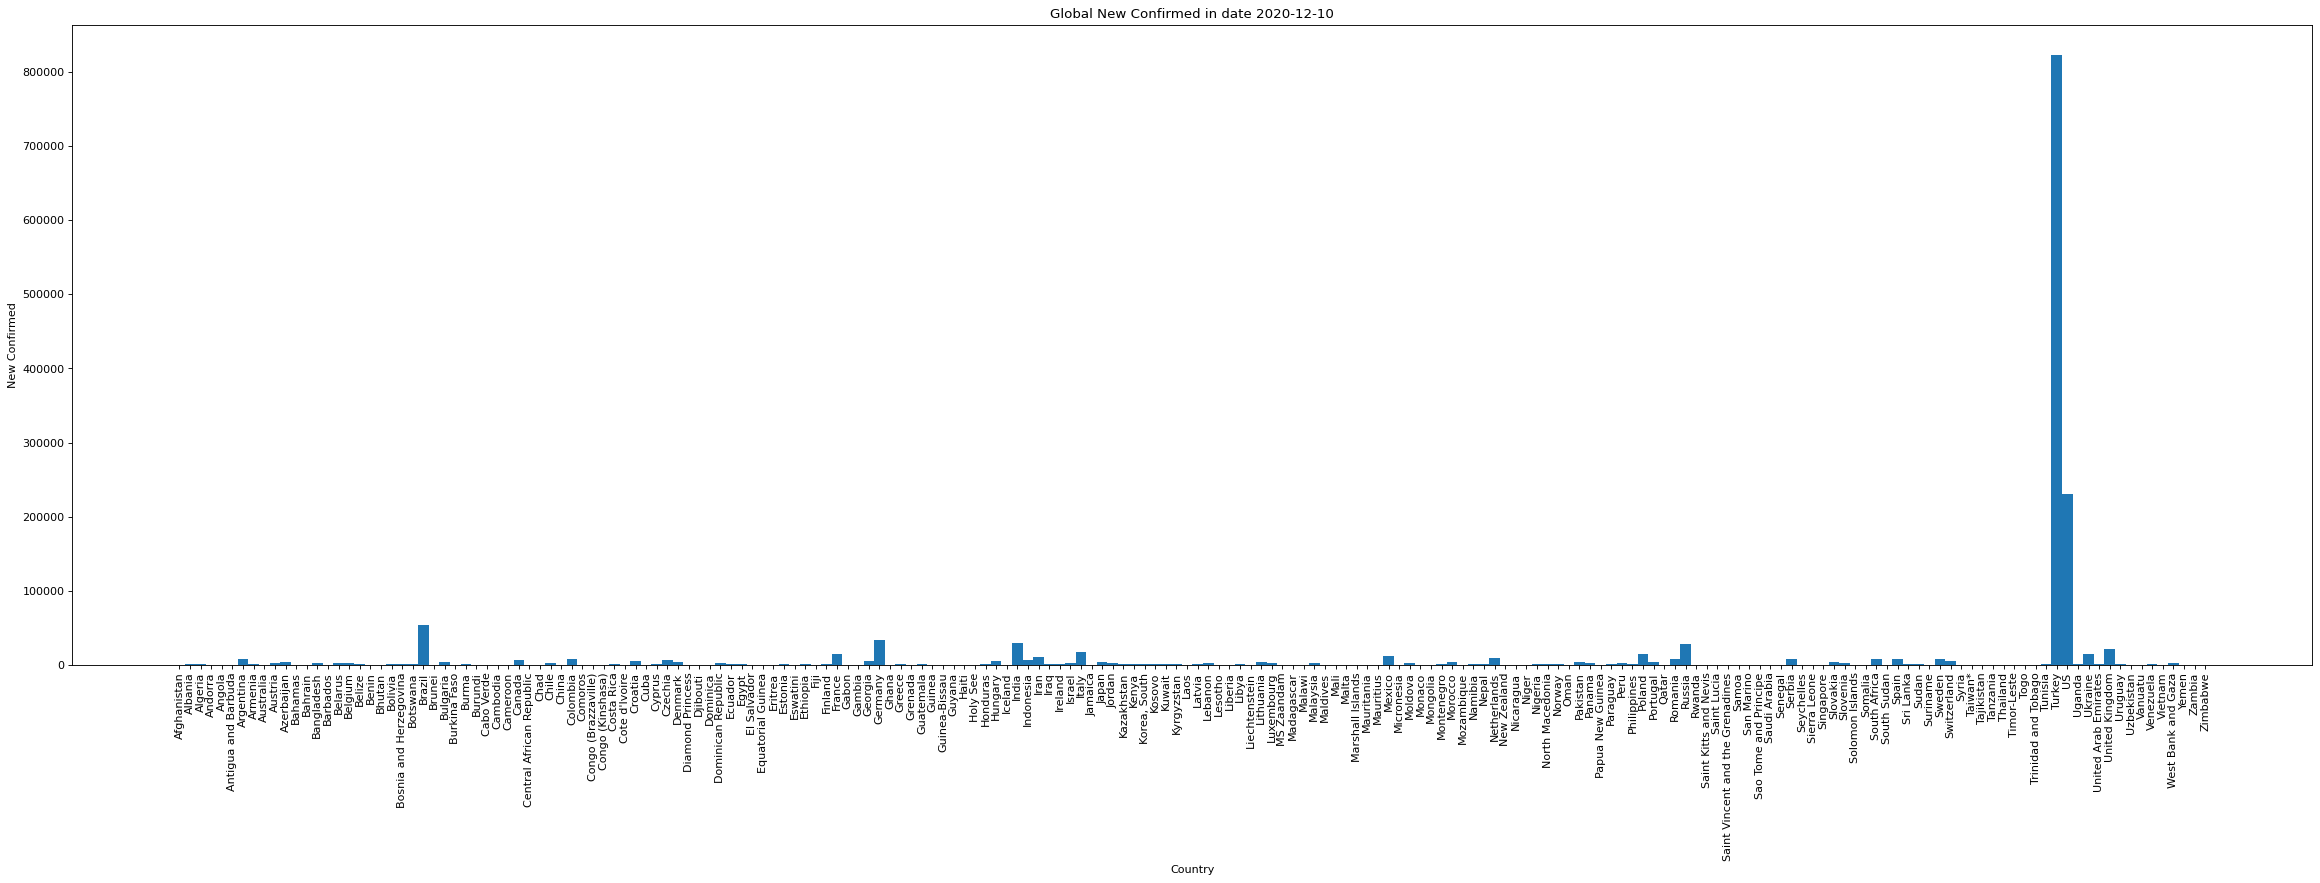

In [15]:
bar_plotting(df, "2020-12-10")

In [132]:
#Plotly animated bar graph
def global_bar_graph_plotly(df, field="New Confirmed", countries=[], height=800, step=10, frame_duration=1000, frame_transition=500):
    if countries == []:
        df_filtered = df
    else:
        df_filtered = df[df["Country"].isin(countries)]

    #Reduce number of data to speed up the animation
    dates = df_filtered["Date"].unique()[::step]
    df_filtered = df_filtered[df_filtered["Date"].isin(dates)]

    fig = px.bar(df_filtered, x="Country", y=field, animation_frame="Date", animation_group="Country", hover_name="Country")
    fig.update_layout(margin=dict(l=20, r=20, t=20, b=200), height=height)

    #fig["layout"].pop("updatemenus") # optional, drop animation buttonsremove negative numbers in plot plotly python
    fig['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 200)
    fig['layout']['sliders'][0]['pad']=dict(r= 10, t= 200)
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = frame_duration
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = frame_transition
    fig.show()

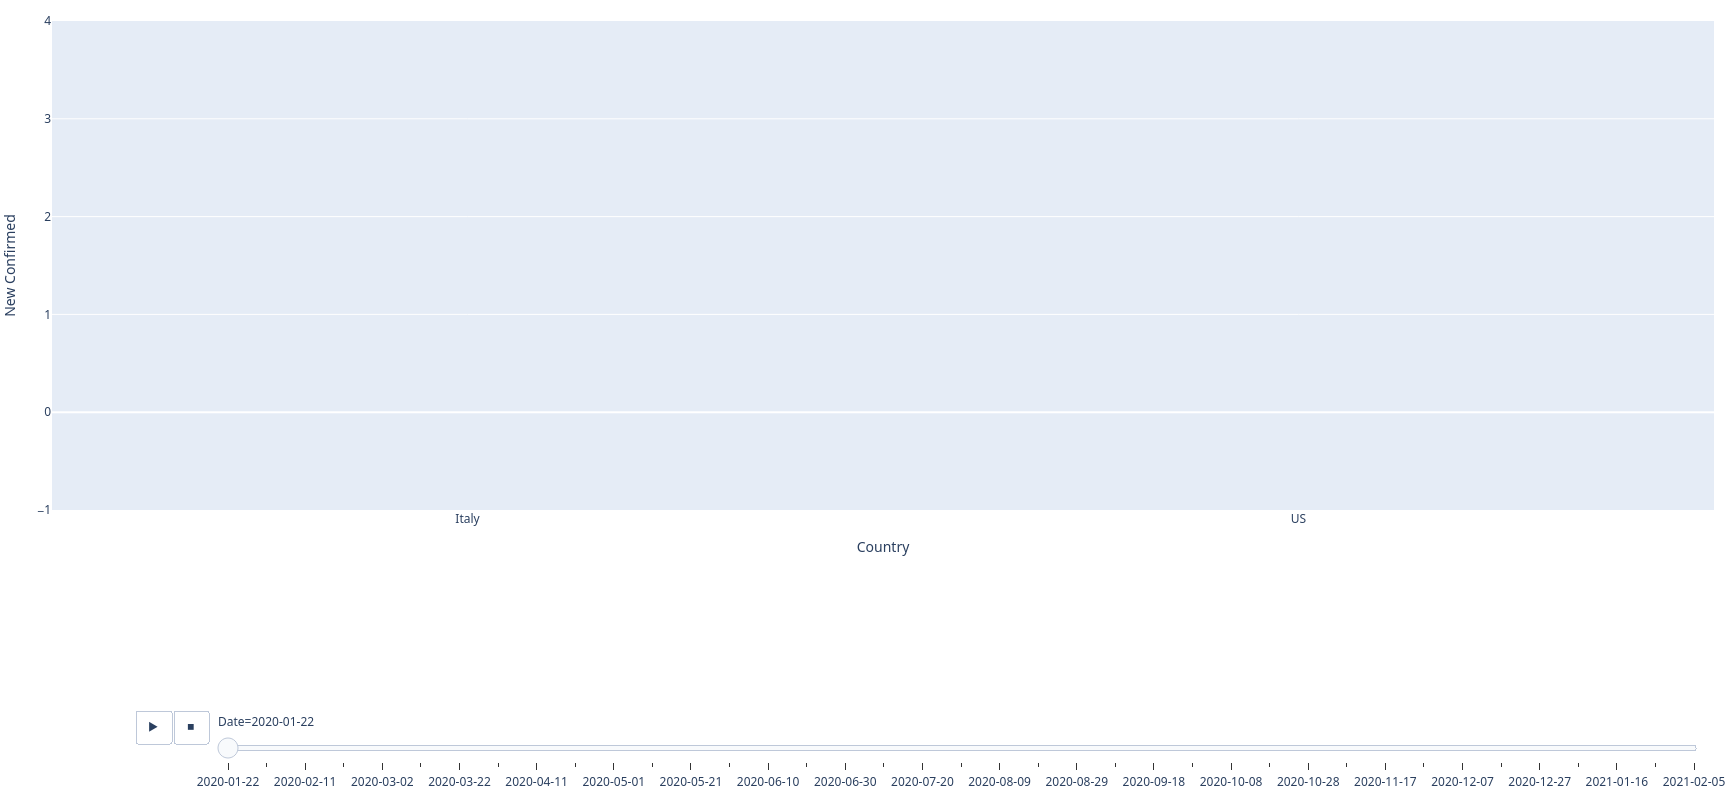

In [137]:
global_bar_graph_plotly(df, countries=["Italy", "US"])

In [ ]:
#Better plots with plotly
def country_plotting_plotly(df, country, field="New Confirmed"):
    if (field not in df.columns):
        print("Field doesn't exists")
        return -1
    elif field not in ["Confirmed", "New Confirmed"]:
        print("Invalid field")
        return -1
    
    country = df.loc[df["Country"] == country]
    
    fig = px.line(country, x="Date", y=field, hover_name=field)
    fig.show()

In [144]:
country_plotting_plotly(df, "US")

NameError: name 'country_plotting_plotly' is not defined